In [1]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.dates as dates
import matplotlib.pyplot as plt
import math
import seaborn as sns
import matplotlib as mpl
from matplotlib.font_manager import FontProperties
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm
%matplotlib inline

/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
TWSE_LOW=pd.read_csv("TWSE_LOW.csv",index_col=0,header=0,parse_dates=True,thousands=',',encoding='ISO-8859-1')
TWSE_HIGH=pd.read_csv("TWSE_HIGH.csv",index_col=0,header=0,parse_dates=True,thousands=',',encoding='ISO-8859-1')
TWSE_CLOSE=pd.read_csv("TWSE_CLOSE.csv",index_col=0,header=0,parse_dates=True,thousands=',',encoding='ISO-8859-1')
TWSE_OPEN=pd.read_csv("TWSE_OPEN.csv",index_col=0,header=0,parse_dates=True,thousands=',',encoding='ISO-8859-1')
TWSE_FOREIGN=pd.read_csv("TWSE_FOREIGN.csv",index_col=0,header=0,parse_dates=True,thousands=',',encoding='ISO-8859-1')
TWSE_TRUST=pd.read_csv("TWSE_TRUST.csv",index_col=0,header=0,parse_dates=True,thousands=',',encoding='ISO-8859-1')
TWSE_SELF=pd.read_csv("TWSE_SELF.csv",index_col=0,header=0,parse_dates=True,thousands=',',encoding='ISO-8859-1')
TWSE_VOLUME=pd.read_csv("TWSE_VOLUME.csv",index_col=0,header=0,parse_dates=True,thousands=',',encoding='ISO-8859-1')
TWSE_VOLUME_VALUE=pd.read_csv("TWSE_VOLUME_VALUE.csv",index_col=0,header=0,parse_dates=True,thousands=',',encoding='ISO-8859-1')
TWSE_index=TWSE_CLOSE.pop("TWSE")

In [3]:
company_name=[]
for i in range(len(TWSE_LOW.columns)):
    company_name.append(TWSE_LOW.columns[i][:4])
TWSE_LOW.columns=company_name
TWSE_HIGH.columns=company_name
TWSE_CLOSE.columns=company_name
TWSE_OPEN.columns=company_name
TWSE_FOREIGN.columns=company_name
TWSE_TRUST.columns=company_name
TWSE_SELF.columns=company_name
TWSE_VOLUME.columns=company_name
TWSE_VOLUME_VALUE.columns=company_name
TWSE_return=TWSE_CLOSE/TWSE_CLOSE.shift(1)
TWSE_CLOSE=TWSE_CLOSE.dropna(axis=1)
TWSE_LOW=TWSE_LOW[TWSE_CLOSE.columns]
TWSE_HIGH=TWSE_HIGH[TWSE_CLOSE.columns]
TWSE_OPEN=TWSE_OPEN[TWSE_CLOSE.columns]
TWSE_FOREIGN=TWSE_FOREIGN[TWSE_CLOSE.columns]
TWSE_TRUST=TWSE_TRUST[TWSE_CLOSE.columns]
TWSE_SELF=TWSE_SELF[TWSE_CLOSE.columns]
TWSE_VOLUME=TWSE_VOLUME[TWSE_CLOSE.columns]
TWSE_VOLUME_VALUE=TWSE_VOLUME_VALUE[TWSE_CLOSE.columns]

In [4]:
mod = ARMA(TWSE_index,order=(1,0))
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   TWSE   No. Observations:                  706
Model:                     ARMA(1, 0)   Log Likelihood               -4456.008
Method:                       css-mle   S.D. of innovations            132.771
Date:                Thu, 29 Nov 2018   AIC                           8918.016
Time:                        09:49:08   BIC                           8931.694
Sample:                    01-04-2016   HQIC                          8923.301
                         - 11-16-2018                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.554e+04   1939.380      8.011      0.000    1.17e+04    1.93e+04
ar.L1.TWSE     0.9984      0.002    612.903      0.000       0.995       1.002
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0016           +0.0000j            1.0016            0.0000
-----------------------------------------------------------------------------
"""

In [5]:
r_squrae=[]
t_value=[]
beta=[]
for i in range(120,len(TWSE_index)):
    TWSE_index_temp=TWSE_index[i-120:i+1]
    print (TWSE_index.index[i])
    x=TWSE_index_temp[:-1]
    y=TWSE_index_temp[1:]
    X=sm.add_constant(x)
    y = list(y)
    model = sm.OLS(y,X)
    results = model.fit()
    r_squrae.append(results.rsquared)
    t_value.append(results.tvalues[1])
    beta.append(results.params[1])
    print(results.rsquared)

2016-07-05 00:00:00
0.94997884408
2016-07-06 00:00:00
0.948756882415
2016-07-07 00:00:00
0.948905611877
2016-07-11 00:00:00
0.94879993458
2016-07-12 00:00:00
0.948616841389
2016-07-13 00:00:00
0.949642727473
2016-07-14 00:00:00
0.949403203793
2016-07-15 00:00:00
0.948958982983
2016-07-18 00:00:00
0.949632013083
2016-07-19 00:00:00
0.949777679574
2016-07-20 00:00:00
0.950064939889
2016-07-21 00:00:00
0.950437374738
2016-07-22 00:00:00
0.952560413162
2016-07-25 00:00:00
0.952024480962
2016-07-26 00:00:00
0.951730778102
2016-07-27 00:00:00
0.953134113472
2016-07-28 00:00:00
0.953968208973
2016-07-29 00:00:00
0.953097658574
2016-08-01 00:00:00
0.952590227562
2016-08-02 00:00:00
0.955610408941
2016-08-03 00:00:00
0.956264866537
2016-08-04 00:00:00
0.957098415017
2016-08-05 00:00:00
0.957867021727
2016-08-08 00:00:00
0.959154330297
2016-08-09 00:00:00
0.960074288731
2016-08-10 00:00:00
0.962574176812
2016-08-11 00:00:00
0.96315862092
2016-08-12 00:00:00
0.96480219078
2016-08-15 00:00:00
0.96

0.976639973386
2017-10-16 00:00:00
0.976956884818
2017-10-17 00:00:00
0.976588123441
2017-10-18 00:00:00
0.976369217864
2017-10-19 00:00:00
0.976090797062
2017-10-20 00:00:00
0.976009759127
2017-10-23 00:00:00
0.975860627941
2017-10-24 00:00:00
0.975711821886
2017-10-25 00:00:00
0.97588043103
2017-10-26 00:00:00
0.975570590375
2017-10-27 00:00:00
0.975216994757
2017-10-30 00:00:00
0.974819366063
2017-10-31 00:00:00
0.974535654877
2017-11-01 00:00:00
0.974357265125
2017-11-02 00:00:00
0.974164101069
2017-11-03 00:00:00
0.97394635785
2017-11-06 00:00:00
0.973669938855
2017-11-07 00:00:00
0.973342317223
2017-11-08 00:00:00
0.972878936699
2017-11-09 00:00:00
0.971808516182
2017-11-10 00:00:00
0.971063625399
2017-11-13 00:00:00
0.970067624053
2017-11-14 00:00:00
0.969463673806
2017-11-15 00:00:00
0.968401828038
2017-11-16 00:00:00
0.967857670916
2017-11-17 00:00:00
0.966299554586
2017-11-20 00:00:00
0.965333562342
2017-11-21 00:00:00
0.963296783991
2017-11-22 00:00:00
0.9627778926
2017-11-2

2018-10-09 00:00:00
0.905120979466
2018-10-11 00:00:00
0.863976618475
2018-10-12 00:00:00
0.863557845443
2018-10-15 00:00:00
0.866810206124
2018-10-16 00:00:00
0.869499548875
2018-10-17 00:00:00
0.871937438041
2018-10-18 00:00:00
0.874513666739
2018-10-19 00:00:00
0.879128527823
2018-10-22 00:00:00
0.882262266656
2018-10-23 00:00:00
0.88370132599
2018-10-24 00:00:00
0.888623719472
2018-10-25 00:00:00
0.892969461977
2018-10-26 00:00:00
0.90268174948
2018-10-29 00:00:00
0.9100129372
2018-10-30 00:00:00
0.916565367506
2018-10-31 00:00:00
0.915898275631
2018-11-01 00:00:00
0.919142844768
2018-11-02 00:00:00
0.92140354364
2018-11-05 00:00:00
0.923466574818
2018-11-06 00:00:00
0.925601782625
2018-11-07 00:00:00
0.926997577147
2018-11-08 00:00:00
0.929362124586
2018-11-09 00:00:00
0.930521238285
2018-11-12 00:00:00
0.932426429367
2018-11-13 00:00:00
0.934331158756
2018-11-14 00:00:00
0.936097832758
2018-11-15 00:00:00
0.937681155257
2018-11-16 00:00:00
0.93915618592


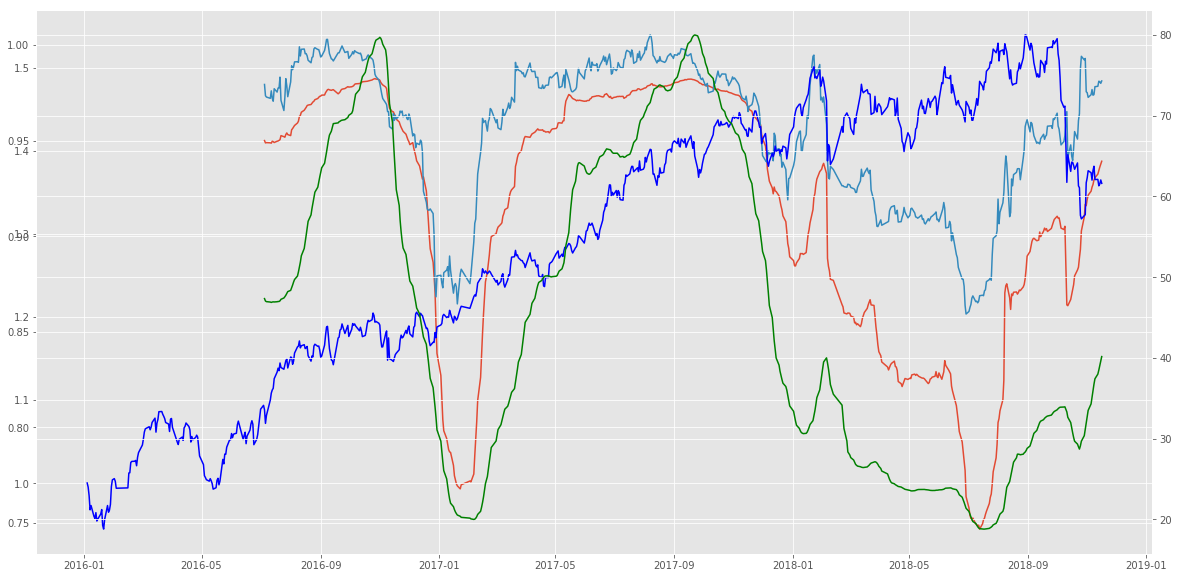

In [6]:
plt.style.use("ggplot")
plt.figure(figsize=(20,10))
plt.plot(TWSE_index.index[120:],r_squrae)
plt.plot(TWSE_index.index[120:],beta)
ax1=plt.twinx()
ax1.plot(TWSE_index.index,TWSE_index/TWSE_index[0],color='b')
ax2=plt.twinx()
ax2.plot(TWSE_index.index[120:],(pd.DataFrame(t_value).rolling(window=10,min_periods=1).mean()),color='g')
plt.show()

In [4]:
TWSE_WEIGHT=pd.read_csv("Z:\Sascha683\working_data\TWSE_WEIGHT.csv").iloc[0,:].astype(float)
TWSE_top100=TWSE_WEIGHT.sort_values(ascending=False)[:103].index

FileNotFoundError: File b'Z:\\Sascha683\\working_data\\TWSE_WEIGHT.csv' does not exist

In [ ]:
TWSE_top100_adj=[]
for i in range(len(TWSE_top100)):
    TWSE_top100_adj.append(TWSE_top100[i][:4])
TWSE_top100_adj.remove('2311')
TWSE_top100_adj.remove('2325')
TWSE_top100_adj.remove('2633')
TWSE_CLOSE=TWSE_CLOSE[TWSE_top100_adj]
TWSE_LOW=TWSE_LOW[TWSE_top100_adj]
TWSE_HIGH=TWSE_HIGH[TWSE_top100_adj]
TWSE_OPEN=TWSE_OPEN[TWSE_top100_adj]
TWSE_FOREIGN=TWSE_FOREIGN[TWSE_top100_adj]
TWSE_TRUST=TWSE_TRUST[TWSE_top100_adj]
TWSE_SELF=TWSE_SELF[TWSE_top100_adj]
TWSE_VOLUME=TWSE_VOLUME[TWSE_top100_adj]
TWSE_VOLUME_VALUE=TWSE_VOLUME_VALUE[TWSE_top100_adj]

In [66]:
TWSE=pd.concat([TWSE_OPEN,TWSE_HIGH,TWSE_CLOSE,TWSE_LOW,TWSE_FOREIGN,TWSE_TRUST,TWSE_SELF,TWSE_VOLUME_VALUE],axis=1)

In [67]:
time=TWSE_LOW.index

In [68]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(TWSE_VOLUME.rolling(min_periods=1,window=15,center=False).mean().astype(float)["2330"])

¦~¤ë¤é
2016-01-04    43800.000000
2016-01-05    45151.000000
2016-01-06    48058.333333
2016-01-07    51912.500000
2016-01-08    52058.200000
2016-01-11    51471.166667
2016-01-12    49137.142857
2016-01-13    49274.625000
2016-01-14    48188.333333
2016-01-15    51334.300000
2016-01-18    50031.909091
2016-01-19    47945.500000
2016-01-20    47674.538462
2016-01-21    46551.857143
2016-01-22    45710.133333
2016-01-25    44604.333333
2016-01-26    43111.000000
2016-01-27    41155.933333
2016-01-28    39451.800000
2016-01-29    39779.533333
2016-01-30    37334.800000
2016-02-01    37914.466667
2016-02-02    36258.666667
2016-02-03    38402.266667
2016-02-15    38230.000000
2016-02-16    39520.200000
2016-02-17    40419.600000
2016-02-18    41583.200000
2016-02-19    41949.000000
2016-02-22    41670.666667
2016-02-23    41356.466667
2016-02-24    41221.800000
2016-02-25    41267.533333
2016-02-26    41835.000000
2016-03-01    40934.266667
2016-03-02    42550.000000
2016-03-03    41552.6

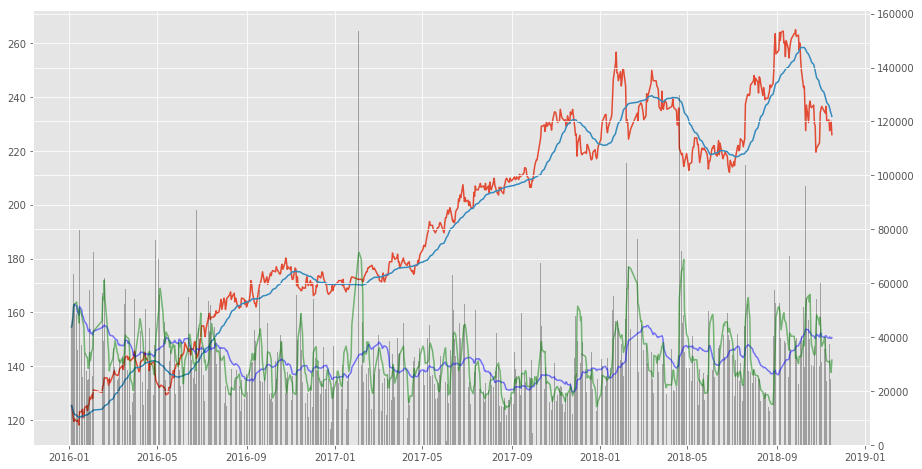

In [69]:
plt.style.use('ggplot')    
plt.figure(figsize=(15,8))
plt.plot(time,TWSE_CLOSE["2330"])
plt.plot(time,TWSE_CLOSE["2330"].rolling(min_periods=1,window=30).mean())
ax1=plt.twinx()
ax1.bar(time,TWSE_VOLUME["2330"],color='black',alpha=0.3)
ax1.plot(time,TWSE_VOLUME.rolling(min_periods=1,window=30,center=False).mean()["2330"],color='blue',alpha=0.5)
ax1.plot(time,TWSE_VOLUME.rolling(min_periods=1,window=5,center=False).mean()["2330"],color='green',alpha=0.5)
#ax2=plt.twinx()
#ax2.plot(time,(TWSE_CLOSE["2330"]-TWSE_OPEN["2330"]),color='g',alpha=0.3)
plt.show()

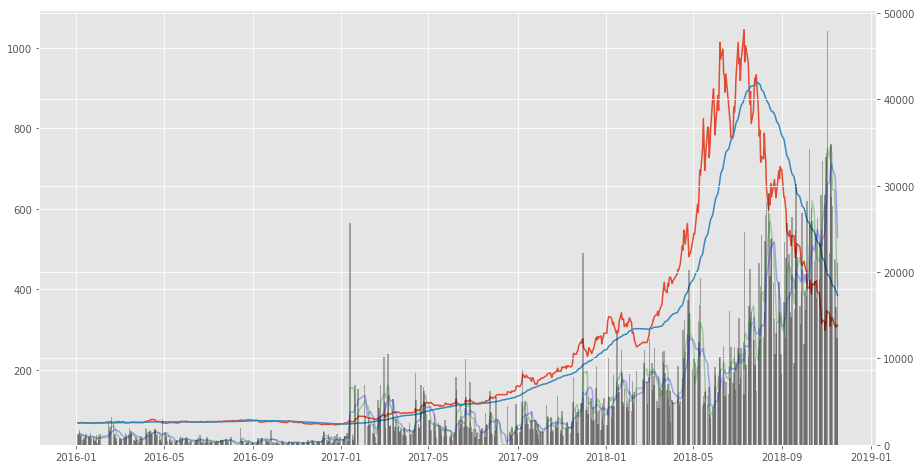

In [70]:
plt.style.use('ggplot')    
plt.figure(figsize=(15,8))
plt.plot(time,TWSE_CLOSE["2327"])
plt.plot(time,TWSE_CLOSE["2327"].rolling(min_periods=1,window=40).mean())
ax1=plt.twinx()
ax1.bar(time,TWSE_VOLUME["2327"],color='black',alpha=0.3,width=2)
ax1.plot(time,TWSE_VOLUME.rolling(min_periods=1,window=10).mean()["2327"],color='blue',alpha=0.3)
ax1.plot(time,TWSE_VOLUME.rolling(min_periods=1,window=5).mean()["2327"],color='green',alpha=0.3)
#ax2=plt.twinx()
#ax2.plot(time,(TWSE_CLOSE["2330"]-TWSE_OPEN["2330"]),color='g',alpha=0.3)
plt.show()

In [71]:
def get_macd_data(df_raw,fast_period=12,slow_period=26,signal_period=9):
    fast_ewm=df_raw.ewm(span=fast_period).mean()
    slow_ewm=df_raw.ewm(span=slow_period).mean()
    dif=fast_ewm-slow_ewm
    dea=dif.ewm(span=signal_period).mean()
    bar=(dif-dea)*2
    red_bar=bar[bar>=0]
    green_bar=bar[bar<0]
    return dif,dea,red_bar,green_bar

In [72]:
title_font=FontProperties(family='YouYuan',size=18)
mpl.rcParams['axes.unicode_minus']=False
def draw_macd(df_raw, dif, dea,red_bar, green_bar,canvas_w=1000, canvas_h=480,title=u'MACD'):
    dpi=72
    figsize=canvas_w/72,canvas_h/72
    plt.figure(figsize=figsize)
    p_dif=plt.plot(dif.index,dif.values)
    p_dea=plt.plot(dea.index,dea.values)
    plt.bar(red_bar.index, red_bar.values, color='#d62728')
    plt.bar(green_bar.index, green_bar.values, color='#889966')
    plt.legend((p_dif[0],p_dea[0]),[u'DIF',u'DEA'])
    plt.title(title,fontproperties=title_font)
    ax1=plt.twinx()
    ax1.plot(df_raw.index,(df_raw/df_raw[0]).values,color='purple',alpha=0.3)
#    ax1.plot(df_raw.index[1:],np.cumprod(MACD_return),color='pink')
    plt.show()

/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['YouYuan'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


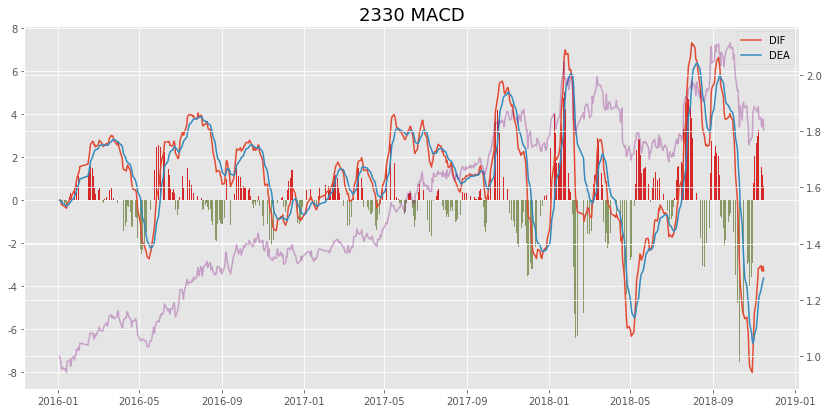

In [73]:
df_raw=TWSE_CLOSE["2330"]
dif,dea,red_bar,green_bar=get_macd_data(df_raw)
draw_macd(df_raw=df_raw,dif=dif,dea=dea,red_bar=red_bar,green_bar=green_bar,title='2330 MACD')

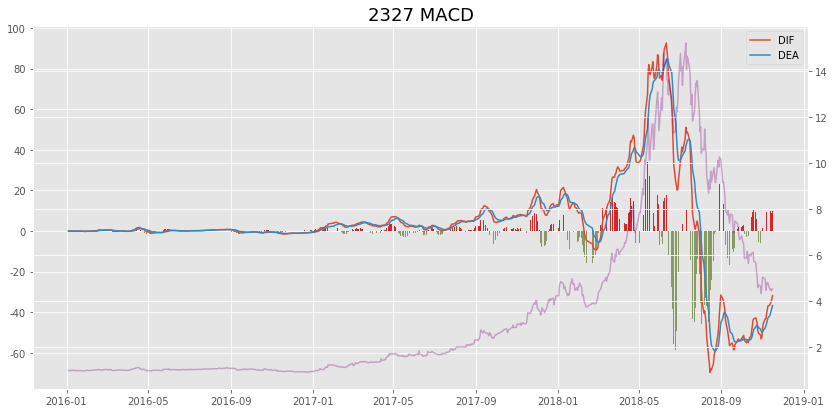

In [74]:
df_raw=TWSE_CLOSE["2327"]
dif,dea,red_bar,green_bar=get_macd_data(df_raw)
draw_macd(df_raw=df_raw,dif=dif,dea=dea,red_bar=red_bar,green_bar=green_bar,title='2327 MACD')

In [75]:
MACD_return=[]
for i in range(1,len(dif)):
    if dif.index[i-1] in green_bar.index and green_bar.loc[dif.index[i-1]]<-1:
        MACD_return.append(1/TWSE_return["2330"][i])
    else:
        MACD_return.append(TWSE_return["2330"][i])

In [76]:
green_bar

2016-01-05    -0.005185
2016-01-06    -0.014465
2016-01-07    -0.014874
2016-01-14    -0.012726
2016-01-15    -0.083883
2016-01-18    -0.032018
2016-01-19    -0.033782
2016-01-20    -0.090542
2016-01-21    -0.070679
2016-01-22    -0.054119
2016-01-25    -0.040359
2016-01-26    -0.168764
2016-01-27    -0.197220
2016-01-28    -0.175403
2016-01-29    -0.124226
2016-01-30    -0.028585
2016-03-04    -0.014657
2016-03-08    -0.104255
2016-03-09    -0.431683
2016-03-10    -0.606806
2016-03-11    -0.691945
2016-03-14    -0.634306
2016-03-15    -0.553069
2016-03-16    -0.411580
2016-03-17    -0.238703
2016-03-18    -0.086994
2016-03-24    -0.147004
2016-03-25    -0.125938
2016-03-28    -0.139742
2016-03-29    -0.141653
                ...    
2018-08-13   -44.720412
2018-08-14   -41.501321
2018-08-15   -39.941197
2018-08-16   -29.200807
2018-08-17   -24.179515
2018-08-20   -14.654662
2018-08-21    -5.453314
2018-08-22    -1.264253
2018-08-23    -0.305879
2018-09-07    -6.814761
2018-09-10   -13

In [77]:
max_dif=TWSE_HIGH.rolling(min_periods=1,window=9,center=False).max()-TWSE_LOW.rolling(min_periods=1,window=9,center=False).min()
now_dif=TWSE_CLOSE-TWSE_LOW.rolling(min_periods=1,window=9,center=False).min()
RSV=now_dif/max_dif

In [78]:
K=pd.DataFrame(columns=TWSE_CLOSE.columns)
D=pd.DataFrame(columns=TWSE_CLOSE.columns)
for i in range(RSV.shape[0]):
    if i == 0:
        K.loc[RSV.index[i]]=RSV.iloc[i,:]
        D.loc[RSV.index[i]]=RSV.iloc[i,:]
    else:
        K.loc[RSV.index[i]]=2/3.0*K.iloc[-1,:]+1/3.0*RSV.iloc[i,:]
        D.loc[RSV.index[i]]=2/3.0*D.iloc[-1,:]+1/3.0*K.iloc[-1,:]

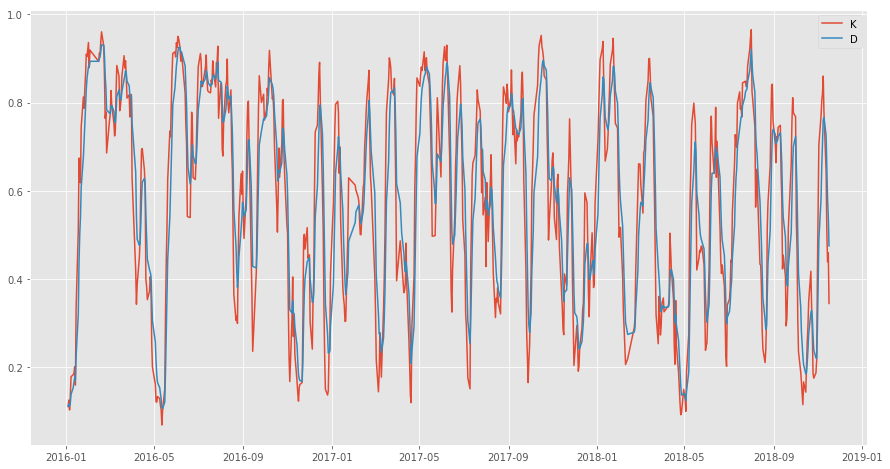

In [79]:
plt.figure(figsize=(15,8))
plt.plot(time,K["2330"],label='K')
plt.plot(time,D["2330"],label='D')
plt.legend()
plt.show()

In [7]:
year_mov=TWSE_CLOSE/TWSE_CLOSE.shift(244)
week_mov=TWSE_CLOSE/TWSE_CLOSE.shift(5)
month_mov=TWSE_CLOSE/TWSE_CLOSE.shift(20)
day30_mov=TWSE_CLOSE.rolling(window=30,min_periods=1).mean().loc["2017-01-01":]
day20_mov_VOL=TWSE_VOLUME.rolling(window=20,min_periods=1).mean().loc["2017-01-01":]
day5_mov_VOL=TWSE_VOLUME.rolling(window=5,min_periods=1).mean().loc["2017-01-01":]
TWSE_index_return=(TWSE_index/TWSE_index.shift(1)).loc["2017-01-01":]
TWSE_index_month_return=(TWSE_index/TWSE_index.shift(20)).loc["2017-01-01":]
year_mov=year_mov.loc["2017-01-01":]
week_mov=week_mov.loc["2017-01-01":]
month_mov=month_mov.loc["2017-01-01":]
return_compare_index=month_mov.sub(TWSE_index_month_return, axis=0)
TWSE_return=(TWSE_CLOSE/TWSE_CLOSE.shift(1)).loc["2017-01-01":]
volume_exam=TWSE_VOLUME.rolling(min_periods=1,window=5,center=False).mean()>TWSE_VOLUME.rolling(min_periods=1,window=20,center=False).mean()
volume_exam=volume_exam.loc["2017-01-01":]
day_change=(TWSE_CLOSE/TWSE_OPEN).loc["2017-01-01":]
TWSE_return["cash"]=np.ones(TWSE_return.shape[0])
TWSE_return_short=1/TWSE_return

In [8]:
drawdown=pd.DataFrame(columns=TWSE_CLOSE.columns)
drawdown.loc[TWSE_CLOSE.index[0]]=np.zeros(TWSE_CLOSE.shape[1])
for i in range(1,TWSE_CLOSE.shape[0]):
    drawdown_temp=[]
    max_price=TWSE_CLOSE.iloc[:(i+1),:].max()
    for j in range(TWSE_CLOSE.shape[1]):
        drawdown_temp.append(-(1-TWSE_CLOSE.iloc[i,j]/max_price[j]))
    drawdown.loc[TWSE_CLOSE.index[i]]=drawdown_temp
drawdown

,2317,6505,2412,2882,2330,1301,1303,1326,3008,2881,...,2390,2461,1533,9943,2321,3040,1109,1217,1459,2906
2016-01-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-01-05,-0.000000,-0.007860,-0.000000,-0.021434,-0.010771,-0.000000,-0.000000,-0.000000,-0.029885,-0.025357,...,-0.009980,-0.000000,-0.004955,-0.011442,-0.063584,-0.000000,-0.000000,-0.000000,-0.028210,-0.000000
2016-01-06,-0.001279,-0.000000,-0.001043,-0.039297,-0.028722,-0.000000,-0.000000,-0.000000,-0.098850,-0.058637,...,-0.041916,-0.015139,-0.059730,-0.022884,-0.069364,-0.010053,-0.001009,-0.000000,-0.061284,-0.011840
2016-01-07,-0.010102,-0.010266,-0.000000,-0.055785,-0.046593,-0.000000,-0.000000,-0.000000,-0.158621,-0.089540,...,-0.086327,-0.044575,-0.111753,-0.050536,-0.046243,-0.047870,-0.000000,-0.000000,-0.056420,-0.032787
2016-01-08,-0.013939,-0.012983,-0.000000,-0.048640,-0.039413,-0.021933,-0.012165,-0.013100,-0.091955,-0.089540,...,-0.041916,-0.044575,-0.052023,-0.049583,-0.040462,-0.037817,-0.005045,-0.000000,-0.046693,-0.032787
2016-01-11,-0.046803,-0.012983,-0.000000,-0.071448,-0.046593,-0.017800,-0.012165,-0.004423,-0.110343,-0.104596,...,-0.061377,-0.048780,-0.044041,-0.061979,-0.017341,-0.018191,-0.010091,-0.033333,-0.071012,-0.036430
2016-01-12,-0.035422,-0.001208,-0.000000,-0.073647,-0.046593,-0.001430,-0.005155,-0.000000,-0.154024,-0.090861,...,-0.078842,-0.052145,-0.036334,-0.043862,-0.057803,-0.008138,-0.010091,-0.050000,-0.107004,-0.044627
2016-01-13,-0.031586,-0.000000,-0.000000,-0.085738,-0.043003,-0.000000,-0.008660,-0.000000,-0.096552,-0.102219,...,-0.066367,-0.052145,-0.061107,-0.045769,-0.000000,-0.024892,-0.010091,-0.048810,-0.107004,-0.072860
2016-01-14,-0.039258,-0.000000,-0.000000,-0.118989,-0.057364,-0.000000,-0.015670,-0.000000,-0.147124,-0.127575,...,-0.066367,-0.052145,-0.093587,-0.057211,-0.000000,-0.031594,-0.009082,-0.085714,-0.129377,-0.085610
2016-01-15,-0.048082,-0.002648,-0.014639,-0.154713,-0.017951,-0.000000,-0.015670,-0.000000,-0.071263,-0.155045,...,-0.049401,-0.037006,-0.085879,-0.060072,-0.074713,-0.013404,-0.008073,-0.085714,-0.135214,-0.089253


In [9]:
up_term=pd.DataFrame(columns=TWSE_CLOSE.columns)
up_index=[]
for i in range(21,TWSE_CLOSE.shape[0]+1):
    temp=(TWSE_CLOSE/TWSE_CLOSE.shift(1)).iloc[i-20:i,:]
    up_term.loc[TWSE_CLOSE.index[i-1]]=temp[temp>1].count()
    temp=(TWSE_index/TWSE_index.shift(1)).iloc[i-20:i]
    up_index.append(temp[temp>1].count())
up_term=up_term.loc["2017-01-01":].sub(pd.Series(up_index,index=up_term.index).loc["2017-01-01":],axis=0)

In [10]:
candidate_long=pd.DataFrame(columns=week_mov.columns)
candidate_long.loc[TWSE_CLOSE.index[243]]=np.zeros(week_mov.shape[1])
for i in range(week_mov.shape[0]):
    for j in range(week_mov.shape[1]):
        if (candidate_long.iloc[i,j]==0):
            if(week_mov.iloc[i,j]>month_mov.iloc[i,j] and volume_exam.iloc[i,j]==True and return_compare_index.iloc[i,j]>0):
                candidate_long.loc[week_mov.index[i],week_mov.columns[j]]=1
            else:
                candidate_long.loc[week_mov.index[i],week_mov.columns[j]]=0
        else:
            if((week_mov.iloc[i,j]<month_mov.iloc[i,j] and volume_exam.iloc[i,j]==True) or up_term.iloc[i,j]<-2):
                candidate_long.loc[week_mov.index[i],week_mov.columns[j]]=0
            else:
                candidate_long.loc[week_mov.index[i],week_mov.columns[j]]=1

In [14]:
candidate_short=pd.DataFrame(columns=week_mov.columns)
candidate_short.loc[TWSE_CLOSE.index[243]]=np.zeros(week_mov.shape[1])
for i in range(week_mov.shape[0]):
    for j in range(week_mov.shape[1]):
        if (candidate_short.iloc[i,j]==0):
            if(week_mov.iloc[i,j]>month_mov.iloc[i,j] and volume_exam.iloc[i,j]==True and return_compare_index.iloc[i,j]<0):
                candidate_short.loc[week_mov.index[i],week_mov.columns[j]]=1
            else:
                candidate_short.loc[week_mov.index[i],week_mov.columns[j]]=0
        else:
            if((week_mov.iloc[i,j]<month_mov.iloc[i,j] and volume_exam.iloc[i,j]==True) or up_term.iloc[i,j]>1):
                candidate_short.loc[week_mov.index[i],week_mov.columns[j]]=0
            else:
                candidate_short.loc[week_mov.index[i],week_mov.columns[j]]=1

In [15]:
weight3=pd.DataFrame(columns=week_mov.columns)
for i in range(week_mov.shape[0]):
    if candidate_short.sum(axis=1)[i]>20:
        top_20=(week_mov)[candidate_short.iloc[i,:][candidate_short.iloc[i,:]>0].index].iloc[i,:].sort_values(ascending=False)[:20].index
        weight3.loc[week_mov.index[i]]=np.zeros(week_mov.shape[1])
        weight3.loc[week_mov.index[i],top_20]=0.05
    else:
        weight3.loc[week_mov.index[i]]=(candidate_short.iloc[i,:]/20).fillna(0)
weight3["cash"]=1-weight3.sum(axis=1)

In [40]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(np.cumprod((weight3.shift(1)*TWSE_return_short).sum(axis=1)[1:]))
allocation3=(weight3.shift(1)*TWSE_return_short).sum(axis=1)[1:]

2017-01-04    1.000000
2017-01-05    0.994461
2017-01-06    0.989504
2017-01-09    1.000485
2017-01-10    1.003145
2017-01-11    0.997901
2017-01-12    0.995867
2017-01-13    0.994470
2017-01-16    1.007631
2017-01-17    1.003331
2017-01-18    1.006595
2017-01-19    1.007060
2017-01-20    1.007471
2017-01-23    1.006946
2017-01-24    1.002262
2017-02-02    0.986155
2017-02-03    0.958335
2017-02-06    0.944093
2017-02-07    0.942231
2017-02-08    0.933323
2017-02-09    0.930964
2017-02-10    0.933538
2017-02-13    0.932112
2017-02-14    0.939238
2017-02-15    0.937005
2017-02-16    0.940843
2017-02-17    0.939875
2017-02-18    0.933804
2017-02-20    0.931871
2017-02-21    0.938430
2017-02-22    0.934401
2017-02-23    0.935104
2017-02-24    0.931270
2017-03-01    0.932955
2017-03-02    0.931354
2017-03-03    0.932988
2017-03-06    0.923125
2017-03-07    0.922707
2017-03-08    0.917837
2017-03-09    0.921298
2017-03-10    0.929023
2017-03-13    0.930757
2017-03-14    0.923022
2017-03-15 

In [19]:
weight2=pd.DataFrame(columns=week_mov.columns)
for i in range(week_mov.shape[0]):
    if candidate_long.sum(axis=1)[i]>20:
        top_20=(week_mov+month_mov)[candidate_long.iloc[i,:][candidate_long.iloc[i,:]>0].index].iloc[i,:].sort_values(ascending=False)[:20].index
        weight2.loc[week_mov.index[i]]=np.zeros(week_mov.shape[1])
        weight2.loc[week_mov.index[i],top_20]=0.05
    else:
        weight2.loc[week_mov.index[i]]=(candidate_long.iloc[i,:]/20).fillna(0)
weight2["cash"]=1-weight2.sum(axis=1)

In [20]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(np.cumprod((weight2.shift(1)*TWSE_return).sum(axis=1)[1:]))
allocation2=(weight2.shift(1)*TWSE_return).sum(axis=1)[1:]

2017-01-04    1.000000
2017-01-05    1.009148
2017-01-06    1.015123
2017-01-09    1.001570
2017-01-10    1.006948
2017-01-11    1.013749
2017-01-12    1.024119
2017-01-13    1.024546
2017-01-16    1.022083
2017-01-17    1.029105
2017-01-18    1.036588
2017-01-19    1.038851
2017-01-20    1.038308
2017-01-23    1.046771
2017-01-24    1.051614
2017-02-02    1.061775
2017-02-03    1.066951
2017-02-06    1.077844
2017-02-07    1.075802
2017-02-08    1.091458
2017-02-09    1.096070
2017-02-10    1.096542
2017-02-13    1.105400
2017-02-14    1.103153
2017-02-15    1.111576
2017-02-16    1.109400
2017-02-17    1.111645
2017-02-18    1.116191
2017-02-20    1.114111
2017-02-21    1.112138
2017-02-22    1.114152
2017-02-23    1.113483
2017-02-24    1.114159
2017-03-01    1.113989
2017-03-02    1.109438
2017-03-03    1.106981
2017-03-06    1.109897
2017-03-07    1.110207
2017-03-08    1.110991
2017-03-09    1.108723
2017-03-10    1.111298
2017-03-13    1.117169
2017-03-14    1.127193
2017-03-15 

In [22]:
abs(weight2-weight2.shift(1)).sum().sum()

423.50000000000006

In [23]:
line_type=(year_mov>1)&(week_mov>month_mov)

In [24]:
sign=((week_mov>1)&volume_exam&line_type)[((week_mov>1)&volume_exam&line_type)>0].count()

In [25]:
suc=(((week_mov>1)&volume_exam&line_type).shift(1)&(TWSE_return.loc["2017-01-01":]>1))[(((week_mov>1)&volume_exam&line_type).shift(1)&(TWSE_return.loc["2017-01-01":]>1))>0].count()

In [26]:
weight=pd.DataFrame(columns=week_mov.columns)
candidate=((return_compare_index>0)&(week_mov>(month_mov))&volume_exam&(up_term<0))[((return_compare_index>0)&(week_mov>month_mov)&volume_exam&(up_term<0))>0]/1
for i in range(week_mov.shape[0]):
    if candidate.sum(axis=1)[i]>20:
        top_20=(week_mov)[candidate.iloc[i,:][candidate.iloc[i,:]>0].index].iloc[i,:].sort_values(ascending=False)[:20].index
        weight.loc[week_mov.index[i]]=np.zeros(week_mov.shape[1])
        weight.loc[week_mov.index[i],top_20]=0.05
    else:
        weight.loc[week_mov.index[i]]=(candidate.iloc[i,:]/20).fillna(0)
weight["cash"]=1-weight.sum(axis=1)

In [27]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(np.cumprod((weight.shift(1)*TWSE_return).sum(axis=1)[1:]))
allocation=(weight.shift(1)*TWSE_return).sum(axis=1)[1:]

2017-01-04    1.001556
2017-01-05    1.005575
2017-01-06    1.009097
2017-01-09    0.999791
2017-01-10    0.999974
2017-01-11    1.002048
2017-01-12    1.003840
2017-01-13    1.006493
2017-01-16    1.000263
2017-01-17    1.000456
2017-01-18    1.002987
2017-01-19    1.002051
2017-01-20    0.998092
2017-01-23    1.004499
2017-01-24    1.005731
2017-02-02    1.016706
2017-02-03    1.033135
2017-02-06    1.053167
2017-02-07    1.053700
2017-02-08    1.062603
2017-02-09    1.069390
2017-02-10    1.061204
2017-02-13    1.073123
2017-02-14    1.071648
2017-02-15    1.069667
2017-02-16    1.066510
2017-02-17    1.064881
2017-02-18    1.070304
2017-02-20    1.070764
2017-02-21    1.068793
2017-02-22    1.066991
2017-02-23    1.065572
2017-02-24    1.066802
2017-03-01    1.072532
2017-03-02    1.072885
2017-03-03    1.072658
2017-03-06    1.069385
2017-03-07    1.069971
2017-03-08    1.071344
2017-03-09    1.064258
2017-03-10    1.055206
2017-03-13    1.062700
2017-03-14    1.067051
2017-03-15 

In [28]:
abs(weight-weight.shift(1)).sum().sum()

360.4000000000001

In [29]:
weight_short=pd.DataFrame(columns=week_mov.columns)
candidate=(((week_mov>1)&line_type)[((week_mov>1)&line_type)>0]/1).fillna(0)
for i in range(week_mov.shape[0]):
    if candidate.sum(axis=1)[i]>20:
        top_20=TWSE_return[candidate.iloc[i,:][candidate.iloc[i,:]>0].index].iloc[i,:].sort_values(ascending=False)[:20].index
        weight_short.loc[week_mov.index[i]]=np.zeros(week_mov.shape[1])
        weight_short.loc[week_mov.index[i],top_20]=0.05
    else:
        weight_short.loc[week_mov.index[i]]=(candidate.iloc[i,:]/20)
weight_short["cash"]=1-weight_short.sum(axis=1)

In [30]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(np.cumprod((weight_short.shift(1)*TWSE_return_short).sum(axis=1)[1:]))
short_allocation=(weight_short.shift(1)*TWSE_return_short).sum(axis=1)[1:]

2017-01-04    0.993557
2017-01-05    0.989499
2017-01-06    0.986536
2017-01-09    0.991199
2017-01-10    0.990281
2017-01-11    0.988986
2017-01-12    0.990516
2017-01-13    0.989836
2017-01-16    1.007121
2017-01-17    0.993914
2017-01-18    0.987733
2017-01-19    0.990365
2017-01-20    0.989985
2017-01-23    0.982750
2017-01-24    0.984473
2017-02-02    0.974558
2017-02-03    0.955066
2017-02-06    0.939414
2017-02-07    0.945287
2017-02-08    0.947208
2017-02-09    0.940755
2017-02-10    0.941167
2017-02-13    0.928678
2017-02-14    0.926479
2017-02-15    0.925840
2017-02-16    0.926959
2017-02-17    0.930369
2017-02-18    0.925895
2017-02-20    0.921445
2017-02-21    0.920545
2017-02-22    0.920383
2017-02-23    0.923506
2017-02-24    0.922336
2017-03-01    0.922400
2017-03-02    0.921362
2017-03-03    0.924560
2017-03-06    0.916836
2017-03-07    0.921242
2017-03-08    0.920527
2017-03-09    0.924921
2017-03-10    0.934770
2017-03-13    0.933159
2017-03-14    0.929450
2017-03-15 

In [31]:
line_type_short=(TWSE_CLOSE.loc["2017-01-01":]<day30_mov)&(day5_mov_VOL>day20_mov_VOL)

In [32]:
weight_long=pd.DataFrame(columns=week_mov.columns)
candidate=((week_mov<1)&line_type_short)/1
for i in range(week_mov.shape[0]):
    if candidate.sum(axis=1)[i]>20:
        top_20=TWSE_return[candidate.iloc[i,:][candidate.iloc[i,:]>0].index].iloc[i,:].sort_values()[:20].index
        weight_long.loc[week_mov.index[i]]=np.zeros(week_mov.shape[1])
        weight_long.loc[week_mov.index[i],top_20]=0.05
    else:
        weight_long.loc[week_mov.index[i]]=candidate.iloc[i,:]/20
weight_long["cash"]=1-weight_long.sum(axis=1)

In [33]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(np.cumprod((weight_long.shift(1)*TWSE_return).sum(axis=1)[1:]))
long_allocation=(weight_long.shift(1)*TWSE_return).sum(axis=1)[1:]

2017-01-04    1.002870
2017-01-05    1.008682
2017-01-06    1.007115
2017-01-09    0.994678
2017-01-10    1.008221
2017-01-11    1.007216
2017-01-12    1.005582
2017-01-13    1.006236
2017-01-16    0.999808
2017-01-17    1.012748
2017-01-18    1.018120
2017-01-19    1.016995
2017-01-20    1.020622
2017-01-23    1.030610
2017-01-24    1.034543
2017-02-02    1.030521
2017-02-03    1.041907
2017-02-06    1.050691
2017-02-07    1.054931
2017-02-08    1.066152
2017-02-09    1.072233
2017-02-10    1.079138
2017-02-13    1.083828
2017-02-14    1.089723
2017-02-15    1.101874
2017-02-16    1.105333
2017-02-17    1.114978
2017-02-18    1.121275
2017-02-20    1.122632
2017-02-21    1.125035
2017-02-22    1.126410
2017-02-23    1.123093
2017-02-24    1.126936
2017-03-01    1.119232
2017-03-02    1.120161
2017-03-03    1.117016
2017-03-06    1.121760
2017-03-07    1.129621
2017-03-08    1.131857
2017-03-09    1.126952
2017-03-10    1.121723
2017-03-13    1.121337
2017-03-14    1.125008
2017-03-15 

In [34]:
(weight_long-weight_short).loc["2018-03-01":"2018-04-30"]

,2317,6505,2412,2882,2330,1301,1303,1326,3008,2881,...,2461,1533,9943,2321,3040,1109,1217,1459,2906,cash
2018-03-01,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.15
2018-03-02,0.00,0.00,0.0,0.00,0.00,0.00,0.05,0.00,0.00,0.00,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2018-03-05,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2018-03-06,0.00,0.00,0.0,0.00,-0.05,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2018-03-07,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2018-03-08,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2018-03-09,-0.05,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2018-03-12,-0.05,0.00,0.0,-0.05,0.00,0.00,0.00,0.00,0.00,-0.05,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.25
2018-03-13,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.05
2018-03-14,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.00,-0.05,0.00,0.00,0.00,0.00,0.00


In [35]:
total_allocation=(long_allocation+short_allocation)-1

In [36]:
total_allocation

2017-01-04    0.996427
2017-01-05    1.001711
2017-01-06    0.995452
2017-01-09    0.992377
2017-01-10    1.012690
2017-01-11    0.997695
2017-01-12    0.999925
2017-01-13    0.999964
2017-01-16    1.011074
2017-01-17    0.999828
2017-01-18    0.999086
2017-01-19    1.001559
2017-01-20    1.003184
2017-01-23    1.002477
2017-01-24    1.005571
2017-02-02    0.986041
2017-02-03    0.991048
2017-02-06    0.992042
2017-02-07    1.010287
2017-02-08    1.012668
2017-02-09    0.998892
2017-02-10    1.006876
2017-02-13    0.991077
2017-02-14    1.003071
2017-02-15    1.010462
2017-02-16    1.004347
2017-02-17    1.012406
2017-02-18    1.000838
2017-02-20    0.996405
2017-02-21    1.001162
                ...   
2018-10-05    1.011718
2018-10-08    0.990884
2018-10-09    0.985899
2018-10-11    0.927263
2018-10-12    1.004356
2018-10-15    1.004611
2018-10-16    0.998384
2018-10-17    1.001941
2018-10-18    0.996113
2018-10-19    0.985302
2018-10-22    1.020622
2018-10-23    1.007184
2018-10-24 

In [37]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(np.cumprod(total_allocation))

2017-01-04    0.996427
2017-01-05    0.998132
2017-01-06    0.993593
2017-01-09    0.986019
2017-01-10    0.998531
2017-01-11    0.996229
2017-01-12    0.996155
2017-01-13    0.996119
2017-01-16    1.007150
2017-01-17    1.006977
2017-01-18    1.006057
2017-01-19    1.007625
2017-01-20    1.010834
2017-01-23    1.013337
2017-01-24    1.018982
2017-02-02    1.004758
2017-02-03    0.995763
2017-02-06    0.987839
2017-02-07    0.998001
2017-02-08    1.010644
2017-02-09    1.009524
2017-02-10    1.016466
2017-02-13    1.007396
2017-02-14    1.010490
2017-02-15    1.021062
2017-02-16    1.025500
2017-02-17    1.038222
2017-02-18    1.039092
2017-02-20    1.035356
2017-02-21    1.036559
2017-02-22    1.037645
2017-02-23    1.038110
2017-02-24    1.040346
2017-03-01    1.033307
2017-03-02    1.033001
2017-03-03    1.033687
2017-03-06    1.029442
2017-03-07    1.041603
2017-03-08    1.042856
2017-03-09    1.043315
2017-03-10    1.049584
2017-03-13    1.047413
2017-03-14    1.046680
2017-03-15 

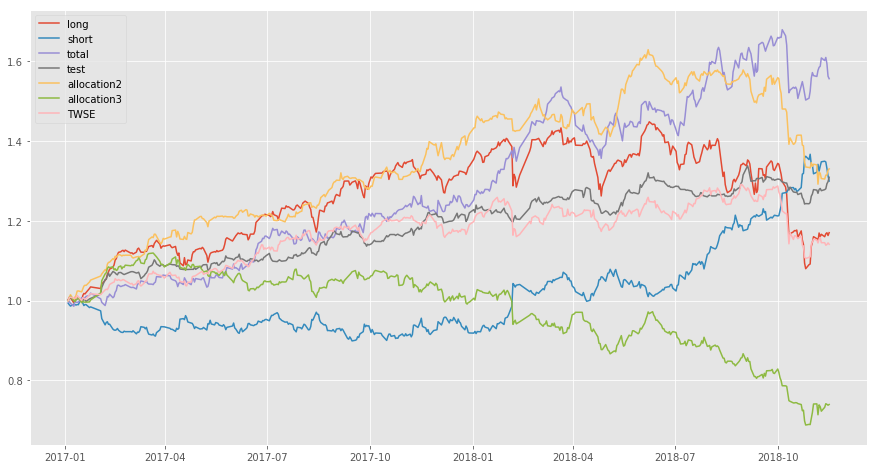

In [39]:
plt.style.use('ggplot')    
plt.figure(figsize=(15,8))
plt.plot(total_allocation.index,np.cumprod(long_allocation),label='long')
plt.plot(total_allocation.index,np.cumprod(short_allocation),label='short')
plt.plot(total_allocation.index,np.cumprod(total_allocation),label='total')
plt.plot(total_allocation.index,np.cumprod(allocation),label='test')
plt.plot(total_allocation.index,np.cumprod(allocation2),label='allocation2')
plt.plot(total_allocation.index,np.cumprod(allocation3),label='allocation3')
plt.plot(total_allocation.index,TWSE_index.loc["2017-01-04":]/TWSE_index.loc["2017-01-04":][0],label='TWSE')
plt.legend()
plt.show()

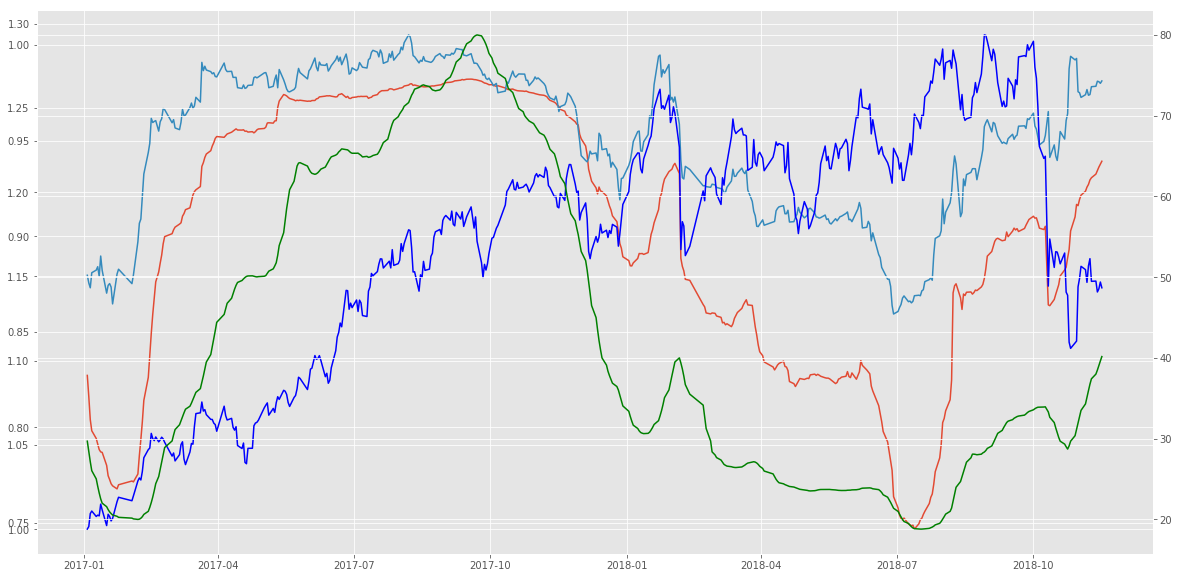

In [119]:
plt.style.use("ggplot")
plt.figure(figsize=(20,10))
plt.plot(TWSE_index.index[120:][124:],r_squrae[124:])
plt.plot(TWSE_index.index[120:][124:],beta[124:])
ax1=plt.twinx()
ax1.plot(TWSE_index.index[244:],TWSE_index[244:]/TWSE_index[244],color='b')
ax2=plt.twinx()
ax2.plot(TWSE_index.index[120:][124:],(pd.DataFrame(t_value).rolling(window=10,min_periods=1).mean())[124:],color='g')
plt.show()

In [103]:
weight_combine=weight_long-weight_short

In [104]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(abs((weight_combine.shift(1)-weight_combine).fillna(0)).sum(axis=1)*0.002)

2017-01-03    0.0000
2017-01-04    0.0044
2017-01-05    0.0058
2017-01-06    0.0044
2017-01-09    0.0056
2017-01-10    0.0068
2017-01-11    0.0072
2017-01-12    0.0064
2017-01-13    0.0070
2017-01-16    0.0072
2017-01-17    0.0072
2017-01-18    0.0072
2017-01-19    0.0064
2017-01-20    0.0060
2017-01-23    0.0070
2017-01-24    0.0064
2017-02-02    0.0062
2017-02-03    0.0066
2017-02-06    0.0056
2017-02-07    0.0056
2017-02-08    0.0062
2017-02-09    0.0054
2017-02-10    0.0056
2017-02-13    0.0062
2017-02-14    0.0054
2017-02-15    0.0054
2017-02-16    0.0066
2017-02-17    0.0056
2017-02-18    0.0052
2017-02-20    0.0036
2017-02-21    0.0036
2017-02-22    0.0036
2017-02-23    0.0040
2017-02-24    0.0042
2017-03-01    0.0044
2017-03-02    0.0048
2017-03-03    0.0050
2017-03-06    0.0054
2017-03-07    0.0052
2017-03-08    0.0056
2017-03-09    0.0050
2017-03-10    0.0058
2017-03-13    0.0064
2017-03-14    0.0060
2017-03-15    0.0062
2017-03-16    0.0058
2017-03-17    0.0054
2017-03-20   

In [112]:
TWSE_index.index[224:]

DatetimeIndex(['2016-12-05', '2016-12-06', '2016-12-07', '2016-12-08',
               '2016-12-09', '2016-12-12', '2016-12-13', '2016-12-14',
               '2016-12-15', '2016-12-16',
               ...
               '2018-11-05', '2018-11-06', '2018-11-07', '2018-11-08',
               '2018-11-09', '2018-11-12', '2018-11-13', '2018-11-14',
               '2018-11-15', '2018-11-16'],
              dtype='datetime64[ns]', length=482, freq=None)